In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dataCollection import *

In [24]:
OC = 'NGC_2158'

In [25]:
#step0: match apogee data with gaia data
apogee_Teff = matchApogeeGaia('k2')

#step 1: get members in gaia IDs and write a simbad input file
gaia_IDs, member_df = genSimbad(OC, "{}/{}_simbad_input.txt".format(OC,OC))

#step 2: astroquery for gaia Gband mags, luminosities and distances
gaia_df = GAIA_query(gaia_IDs)

#step 3: merging apogee_gaia df with gaia_df
step3_df = mergeApogee(gaia_df, apogee_Teff)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TableReplaceWarning: converted column 'r_result_flag' from integer to float
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TableReplaceWarning: converted column 'r_modality_flag' from integer to float
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: TableReplaceWarning: converted column 'k2_kepmagerr' from integer to float
  


Found 328589 matching APOGEE and GAIA stars.
2609 of those stars have Teff data.
There is 1633 stars in the membership paper.
Simbad input txt file saved as "NGC_2158/NGC_2158_simbad_input.txt".
Launching GAIA query...


Obtained 1633 out of 1633 stars in the cluster.
Matching APOGEE Teffs to queried GAIA stars
Found 0 matching stars with APOGEE Teff data.


In [26]:
#step 4: read simbad output file and combine it to step3_df
step4_df = readSimbad(f'{OC}/{OC}_simbad_output.txt',step3_df)

#step 5: matching back in ra, dec and membership prob from membership paper, and apply membership cut for total membership>99%
step5_df = membershipCut(step4_df, member_df)

#step 6: Teff selection: 1.apogee, 2.singulars, 3.take away problematics, 
# 4.apply most widespread source of Teff until all multiples have Teff, 5.manual picking of problematics
assigned_df, problematic_df, final_ranks = assignTeff(step5_df)
final_ranks

Reading SIMBAD output and merging it to GAIA+APOGEE data...
found 1633 matching IDs
77 stars have Teff data
Found Teff for 77 stars between SIMBAD and APOGEE.
Matching in membership data and applying membership cut...
54/77 stars are taken as cluster members
Using APOGEE Teff for 0 stars.
There are 37 stars without APOGEE data and have Teff provided by only one paper.
Picking Teff automatically for 9 stars, 8 stars require manual picking.


C:\Users\User\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
C:\Users\User\Documents\UoB physics stuff\year 4\FYP\Simbad\dataCollection.py:264: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Teff'][i] = paper[0]
C:\Users\User\Documents\UoB physics stuff\year 4\FYP\Simbad\dataCollection.py:265: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ref'][i] = paper[2]
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopy

,ref,count
0,2011AJ....141...89S,31.0
1,2016A&A...594A..43H,8.0
2,2011AJ....142...59J,3.0
3,2016ApJ...823..114N,3.0
4,2013AJ....145..107J,1.0


In [27]:
#manual assigning of problematic Teffs
problematic_df = replaceManual(problematic_df, final_ranks)
step6_df = pd.concat([assigned_df,problematic_df])
step6_df.sort_index(inplace=True)

Star 1/8, GAIA ID: 3426165269666731776
0: 5038.0 2016A&A...594A..43H 8 entries
1: 4994.0 2016ApJ...823..114N 3 entries
2: 4930.0 2013AJ....146..133M 0 entries
3: 5164.0 2011AJ....141...89S 31 entries
4: 4900.0 2011AJ....142...59J 3 entries
Teff choice?0


C:\Users\User\Documents\UoB physics stuff\year 4\FYP\Simbad\dataCollection.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Teff'][i] = Teff[decision_index]
C:\Users\User\Documents\UoB physics stuff\year 4\FYP\Simbad\dataCollection.py:296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ref'][i] = ref[decision_index]
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a


Star 2/8, GAIA ID: 3426165334090305664
0: 5005.0 2016ApJ...823..114N 3 entries
1: 4800.0 2011AJ....142...59J 3 entries
Teff choice?0

Star 3/8, GAIA ID: 3426165956861468288
0: 4957.0 2016A&A...594A..43H 8 entries
1: 4907.0 2016ApJ...823..114N 3 entries
2: 4879.0 2013AJ....146..133M 0 entries
3: 5072.0 2011AJ....141...89S 31 entries
Teff choice?1

Star 4/8, GAIA ID: 3426165991221226496
0: 4995.0 2016ApJ...823..114N 3 entries
1: 4800.0 2011AJ....142...59J 3 entries
Teff choice?0

Star 5/8, GAIA ID: 3426175577588305920
0: 4931.0 2016ApJ...823..114N 3 entries
1: 4700.0 2011AJ....142...59J 3 entries
Teff choice?0

Star 6/8, GAIA ID: 3426179219719854464
0: 5072.0 2016ApJ...823..114N 3 entries
1: 4800.0 2011AJ....142...59J 3 entries
Teff choice?0

Star 7/8, GAIA ID: 3426271814916387200
0: 5026.0 2016ApJ...823..114N 3 entries
1: 4800.0 2011AJ....142...59J 3 entries
Teff choice?0

Star 8/8, GAIA ID: 3426272025373784832
0: 4965.0 2011AJ....141...89S 31 entries
1: 4600.0 2011AJ....142...59J 3 en

In [28]:
#listing all papers to google
countUniqueRefs(step6_df, column='ref')

,ref,count
0,2011AJ....141...89S,32.0
1,2016A&A...594A..43H,9.0
2,2016ApJ...823..114N,9.0
3,2011AJ....142...59J,3.0
4,2013AJ....145..107J,1.0


In [29]:
#Matching Teff errors from papers:
resulting_df = matchTeff_err(step6_df, '2011AJ....141...89S', OC+'/2011AJ....141...89S_Teff.txt',3,4,7,8)
resulting_df = fixedTeff_err(resulting_df, '2016A&A...594A..43H', 80)
resulting_df = fixedTeff_err(resulting_df, '2016ApJ...823..114N', 200)
resulting_df = fixedTeff_err(resulting_df, '2011AJ....142...59J', 200)
step7_df = fixedTeff_err(resulting_df, '2013AJ....145..107J', 100)

C:\Users\User\Documents\UoB physics stuff\year 4\FYP\Simbad\dataCollection.py:457: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Teff_err'][i] = list(suspect_df['Teff_err'])[np.argmin(angular_dist)]
C:\Users\User\Documents\UoB physics stuff\year 4\FYP\Simbad\dataCollection.py:451: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Teff_err'][i]=Teff_err[j]
C:\Users\User\Documents\UoB physics stuff\year 4\FYP\Simbad\dataCollection.py:475: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [30]:
dist = step7_df['distance']
dist = dist[np.logical_not(np.isnan(dist))]
dist_err = step7_df['distance_err']
dist_err = dist_err[np.logical_not(np.isnan(dist_err))]
mean_dist = np.sum(dist*dist_err**(-2))/np.sum(dist_err**(-2))
mean_dist_err = np.sqrt(1/np.sum(dist_err**(-2)))
print(mean_dist, mean_dist_err)
#mean_dist_err=0
luminosity, luminosity_err = lum_calc(OC, step7_df['g_mag'], step7_df['g_mag_err'], mean_dist, mean_dist_err, list(step7_df['Teff']), list(step7_df['Teff_err']))
step8_df = step7_df.copy()
step8_df['cal_lum'] = luminosity
step8_df['cal_lum_err'] = luminosity_err
step8_df.dropna(subset=['cal_lum'],inplace=True)

4009.3916932040615 128.56971322812603


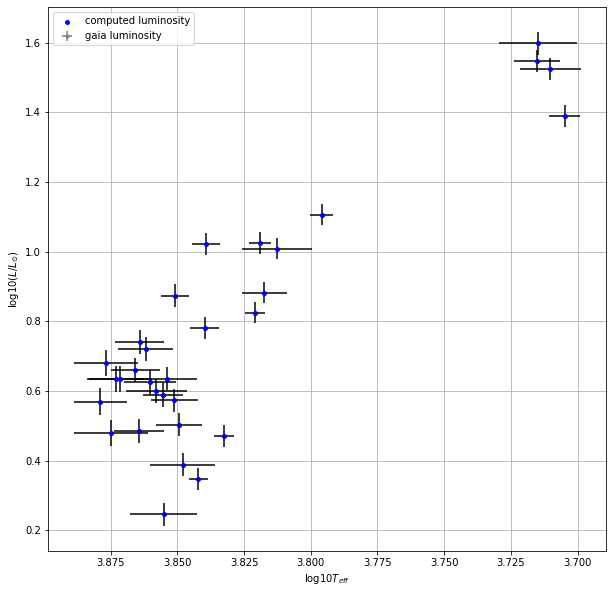

In [31]:
#apply cut that removes RGB stars
step8_df['value'] = 10*np.log10(step8_df['Teff'])-np.log10(step8_df['cal_lum'])-35.5
cut_df = step8_df[step8_df['value']>0].copy()

#plotting cluster to count number of blue stragglers, and other stars to remove
plotCluster(cut_df, plot_gaia=True)

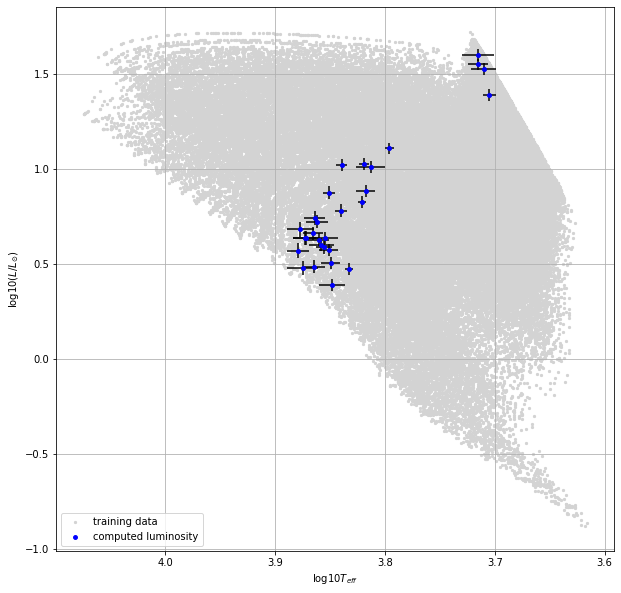

In [34]:
#removing blue stragglers
#no blue stragglers

#removing other weird stars
step9_df = removeStars(cut_df, 3.85, 0.2,1)

plotCluster(step9_df, plot_gaia=False, plot_train=True, grid_path='grid2_early.csv')

In [35]:
#save data to csv
step9_df.to_csv(f'{OC}/{OC}_final.csv',index=False)

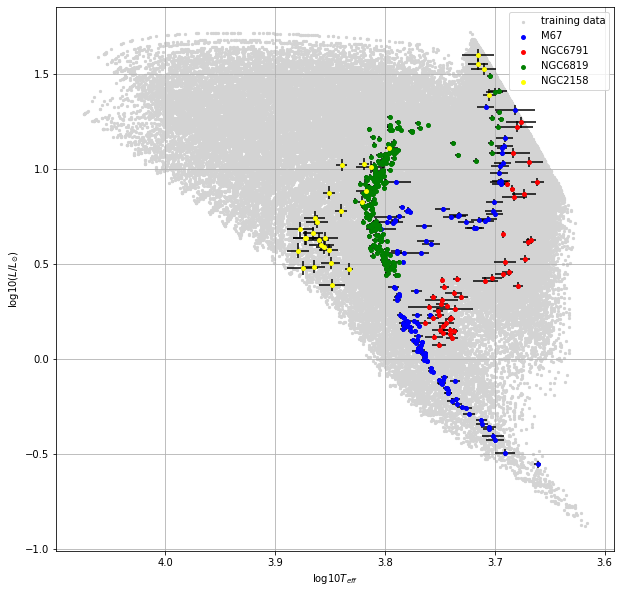

In [36]:
def prepPlot(df, colour, label):
    log_cal_lum_err = df['cal_lum_err']/(df['cal_lum']*np.log(10))
    log_Teff_err = df['Teff_err']/(df['Teff']*np.log(10))
    ax.errorbar(np.log10(df['Teff']), np.log10(df['cal_lum']), xerr=log_Teff_err, yerr=log_cal_lum_err, fmt='.', zorder=2, c='black')
    ax.scatter(np.log10(df['Teff']), np.log10(df['cal_lum']), s=15, zorder=3, c=colour, label=label)

M67_df = pd.read_csv('NGC_2682/NGC_2682_final.csv')
NGC6791_df = pd.read_csv('NGC_6791/NGC_6791_final.csv')
NGC6819_df = pd.read_csv('NGC_6819/NGC_6819_final.csv')
NGC2158_df = pd.read_csv('NGC_2158/NGC_2158_final.csv')

fig, ax=plt.subplots(1,1, figsize=(10,10))
train_df = pd.read_csv('grid2_early.csv')
points = train_df[:100000]
ax.scatter(np.log10(points['effective_T']),np.log10(points['luminosity']), s=5, zorder=0, c='lightgrey',label='training data')
prepPlot(M67_df, 'blue', 'M67')
prepPlot(NGC6791_df, 'red', 'NGC6791')
prepPlot(NGC6819_df, 'green', 'NGC6819')
prepPlot(NGC2158_df, 'yellow', 'NGC2158')
ax.set_xlim(ax.get_xlim()[::-1])
ax.set_xlabel(r'$\log10 T_{eff}$')
ax.set_ylabel(r'$\log10(L/L_{\odot})$')
ax.legend()
ax.grid()
plt.show()